<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classification_heartDisease_Decisiontree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
base = pd.read_csv('/content/heart.csv')

In [8]:
base.shape

(303, 14)

In [9]:
base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
base.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
np.unique(base['target'], return_counts=True)

(array([0, 1]), array([138, 165]))

ou seja, 138 pessoas (0) não tem problema no coração e 165 pesoas (1) tem

In [51]:
np.unique(base['sex'], return_counts=True)

(array([0, 1]), array([ 96, 207]))

In [52]:
np.unique(base['cp'], return_counts=True)

(array([0, 1, 2, 3]), array([143,  50,  87,  23]))

In [11]:
base.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

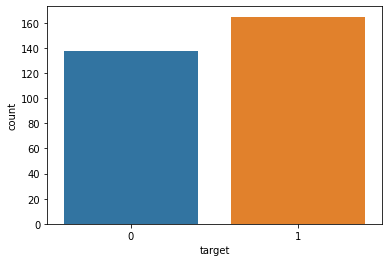

In [14]:
sns.countplot( x = base['target']);

In [17]:
x = base.iloc[:,0:13].values
y = base.iloc[:,13].values

In [18]:
x.shape

(303, 13)

In [19]:
y.shape

(303,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_treino, x_teste, y_treino,y_teste = train_test_split( x, y, test_size=0.25, random_state=0)

In [22]:
x_treino.shape

(227, 13)

In [23]:
y_treino.shape

(227,)

In [24]:
x_teste.shape

(76, 13)

In [25]:
y_teste.shape

(76,)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree = DecisionTreeClassifier(criterion='entropy')

In [32]:
tree.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [33]:
prev = tree.predict(x_teste)

In [34]:
prev

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [35]:
y_teste

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [53]:
from sklearn.metrics import accuracy_score, classification_report

In [37]:
accuracy_score(y_teste, prev)

0.7894736842105263

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [41]:
rf.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [42]:
previsao = rf.predict(x_teste)

In [43]:
previsao

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [44]:
y_teste

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [45]:
accuracy_score(y_teste, previsao)

0.8289473684210527

chegamos a um boa acurácia

In [46]:
from yellowbrick.classifier import ConfusionMatrix

In [47]:
cm = ConfusionMatrix(rf)

0.8289473684210527

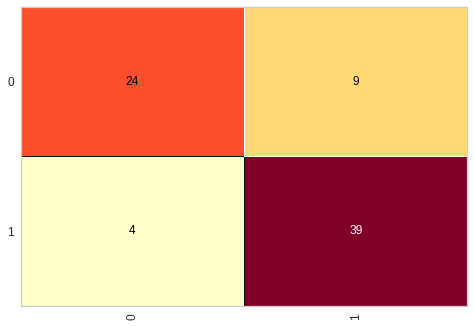

In [48]:
cm.fit(x_treino,y_treino)
cm.score(x_teste,y_teste)

o algoritmo preveu corretamente que 24 pessoas não tinham problema no coração, mas classificou 9 como tendo de maneira errada; por outro lado preveu corretamente que 39 tinham problema no coração e errou na prevendo que 4 não tinham; no geral um bom desempenho

In [56]:
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n           0       0.86      0.73      0.79        33\n           1       0.81      0.91      0.86        43\n\n    accuracy                           0.83        76\n   macro avg       0.83      0.82      0.82        76\nweighted avg       0.83      0.83      0.83        76\n'